In [9]:
#Verify GPU
!nvidia-smi

Mon Feb  6 21:54:23 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 367.57                 Driver Version: 367.57                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | BC6C:00:00.0     Off |                    0 |
| N/A   47C    P0    57W / 149W |     65MiB / 11439MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [10]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from PIL import Image
from PIL import ImageDraw
from skimage.feature import  blob_log
# Make sure that caffe is on the python path:
caffe_root = '/usr/local/caffe/' 
import sys
sys.path.insert(0, caffe_root + 'python')

TEST_IMAGES_PATH='/usr/local/db/coco/bottle/train/images/'
TEST_LABELS_PATH='/usr/local/db/coco/bottle/train/labels/'
TESTIMAGE=TEST_IMAGES_PATH+'000000089051.jpg'
LABELFILE=TEST_LABELS_PATH+'000000089051.txt'

In [11]:
!cat /usr/local/db/coco/bottle/train/labels/000000089051.txt

bottle 0 0 0 121.15 235.31 134.4 271.24 0 0 0 0 0 0 0 0
bottle 0 0 0 156.22 226.48 166.27 258.35 0 0 0 0 0 0 0 0
bottle 0 0 0 230.48 204.62 245.56 237.5 0 0 0 0 0 0 0 0
bottle 0 0 0 204.0 202.21 219.31 222.9 0 0 0 0 0 0 0 0


The number of bounding boxes is 4


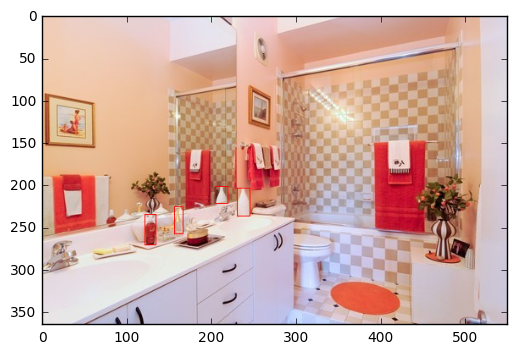

In [12]:
LABEL_FILE=open(LABELFILE).readlines()
testimage=Image.open(TESTIMAGE)
draw=ImageDraw.Draw(testimage)
for i in LABEL_FILE:
    a=np.array(i.split()[4:8],np.dtype(np.float))
    t=[float(x) for x in a]
    draw.rectangle(t,outline='red') #draw rectangles

plt.imshow(np.array(testimage))
testimage.save('input_target_overlay_'+TESTIMAGE[TESTIMAGE.rfind('/')+1:-4]+'.png')
print 'The number of bounding boxes is', len(LABEL_FILE)